In [44]:
import pandas as pd
from hypecommons import plot, display, plt

df = pd.read_csv('investing-signals.tsv', sep='\t', names=['dt', 'close', 'signal'])
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
df = df.resample('1H').ffill().dropna()
df

,close,signal
dt,,
2021-09-30 03:00:00,366.8,Strong Buy
2021-09-30 04:00:00,373.7,Strong Buy
2021-09-30 05:00:00,378.6,Strong Buy
2021-09-30 06:00:00,376.9,Strong Buy
2021-09-30 07:00:00,382.7,Strong Buy
...,...,...
2021-11-09 16:00:00,648.4,Strong Buy
2021-11-09 17:00:00,639.2,Strong Sell
2021-11-09 18:00:00,641.2,Strong Sell


In [45]:
action = []
stake = [1]
invested = False
last_close = None
buy_fees = 0.00075
sell_fees = 0

for i, row in df.iterrows():
    if invested:
        stake.append(stake[-1] / last_close * row['close'])
    else:
        stake.append(stake[-1])
    if not invested and row['signal'] in ['Buy', 'Strong Buy']:
        invested = True
        close_at_buy = row['close']
        action.append('BUY')
        stake[-1] = (1-buy_fees) * stake[-1]
    elif invested and row['signal'] in ['Sell', 'Strong Sell']:
        invested = False
        action.append('SELL')
        stake[-1] = (1-sell_fees) * stake[-1]
    else:
        action.append('----')
    last_close = row['close']

df['action'] = action
df['strategy'] = stake[1:]
df['hold'] = df['close'] / df.iloc[0]['close']

df

,close,signal,action,strategy,hold
dt,,,,,
2021-09-30 03:00:00,366.8,Strong Buy,BUY,0.999250,1.000000
2021-09-30 04:00:00,373.7,Strong Buy,----,1.018047,1.018811
2021-09-30 05:00:00,378.6,Strong Buy,----,1.031396,1.032170
2021-09-30 06:00:00,376.9,Strong Buy,----,1.026765,1.027535
2021-09-30 07:00:00,382.7,Strong Buy,----,1.042565,1.043348
...,...,...,...,...,...
2021-11-09 16:00:00,648.4,Strong Buy,BUY,1.492434,1.767721
2021-11-09 17:00:00,639.2,Strong Sell,SELL,1.471259,1.742639
2021-11-09 18:00:00,641.2,Strong Sell,----,1.471259,1.748092


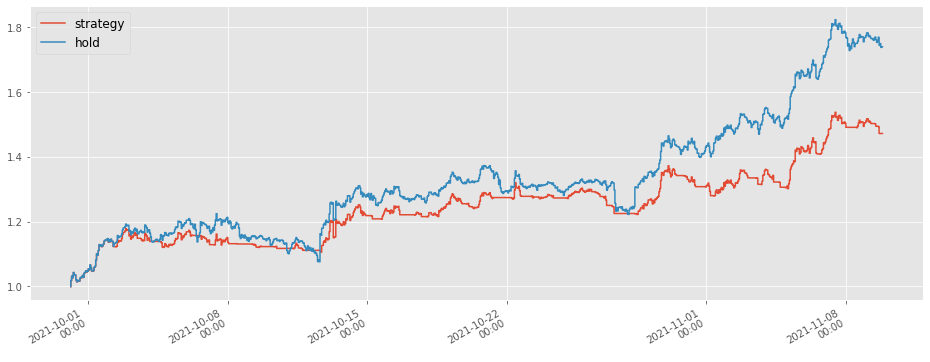

In [50]:
plot(plt.plot, df, ['strategy', 'hold'], fig_size=(16, 6))